In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. 
For this project we are analyzing Airbnb’s New York City(NYC) data of 2019.
We have analyzed this dataset from different angles and have come up with interesting insights.
This can help in making strategic data-driven decisions by the marketing team, 
finance team and technical team of Airbnb.

In [2]:
import os 
os.chdir(r'C:\Users\rahul\Downloads')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### data cleaning 

In [5]:
#Remove latitude, longitude, last_review and reviews_per_month columns from original dataset
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [6]:
#null values
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [7]:
#we apply dropna() function to entire dataset and drop null values with dropna() function 
df = df.dropna()

In [8]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


### 1.What is the average preferred price by customers according to the location?

In [16]:
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index(name='Average_price')

avg_preffered_price_df

,neighbourhood_group,room_type,Average_price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [20]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

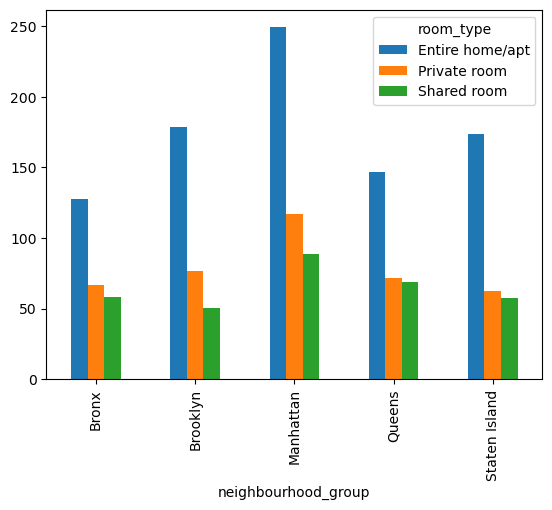

In [21]:
avg_preffered_price_df.plot.bar()

**Q1: How are the property listings distributed over the neighbourhoods?**

In [25]:
n_per_neighbourhood = df.groupby('neighbourhood_group').size().reset_index(name='number_of_properties')

In [26]:
n_per_neighbourhood

,neighbourhood_group,number_of_properties
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


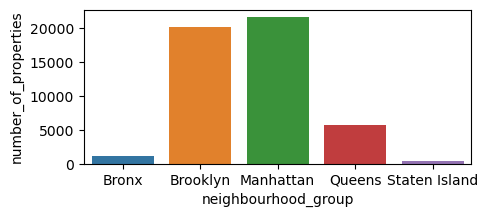

In [27]:
plt.figure(figsize=(5,2))
sns.barplot(data=n_per_neighbourhood, x='neighbourhood_group',y='number_of_properties')
plt.show()

In [37]:
n_per_neighbourhood['Percent_of_total'] = (n_per_neighbourhood['number_of_properties']/total_prop)*100

In [38]:
n_per_neighbourhood

,neighbourhood_group,number_of_properties,Percent_of_total
0,Bronx,1091,2.231312
1,Brooklyn,20104,41.116679
2,Manhattan,21661,44.301053
3,Queens,5666,11.588097
4,Staten Island,373,0.762859


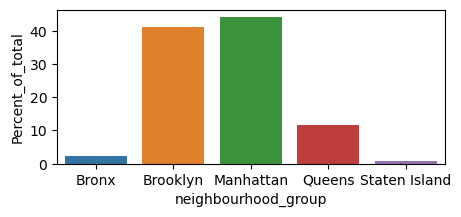

In [39]:
plt.figure(figsize=(5,2))
sns.barplot(data=n_per_neighbourhood, x='neighbourhood_group',y='Percent_of_total')
plt.show()

**Q2: How is the customer preference related to locations?**

In [10]:
reviews_data = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index(name='avg_number_reviews')

In [11]:
reviews_data

,neighbourhood_group,avg_number_reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


<Axes: xlabel='neighbourhood_group', ylabel='avg_number_reviews'>

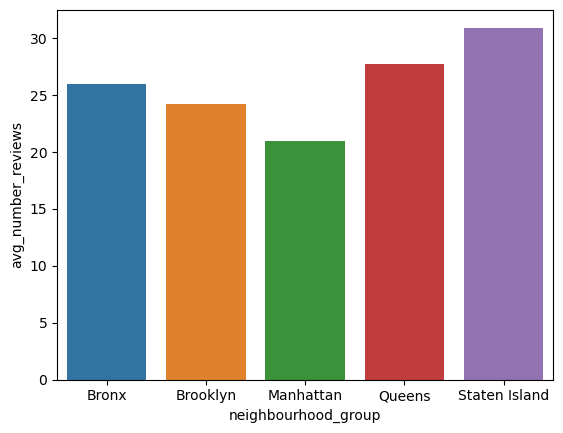

In [12]:
sns.barplot(data=reviews_data, x='neighbourhood_group', y='avg_number_reviews')

**Q3: How are the listings distributed over different types of properties**

In [41]:
prop_type = df.groupby('room_type').size().reset_index(name='total_properties')

In [42]:
prop_type

,room_type,total_properties
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


<Axes: xlabel='room_type', ylabel='total_properties'>

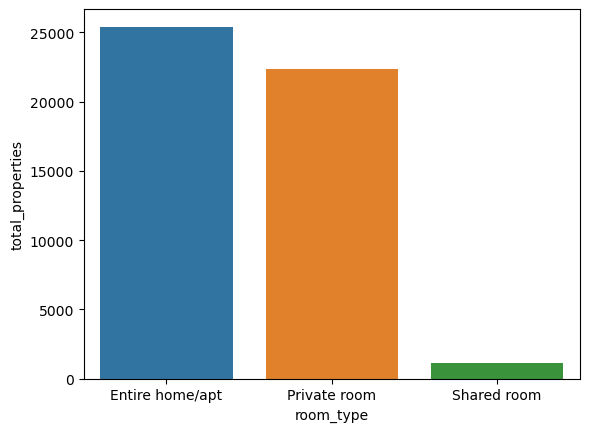

In [43]:
sns.barplot(x='room_type', y='total_properties',data=prop_type)

**Q4: What type of properties preferred by customer**

In [45]:
pref_data=df.groupby('room_type')['number_of_reviews'].mean().reset_index(name='Average rating')

<Axes: xlabel='room_type', ylabel='Average rating'>

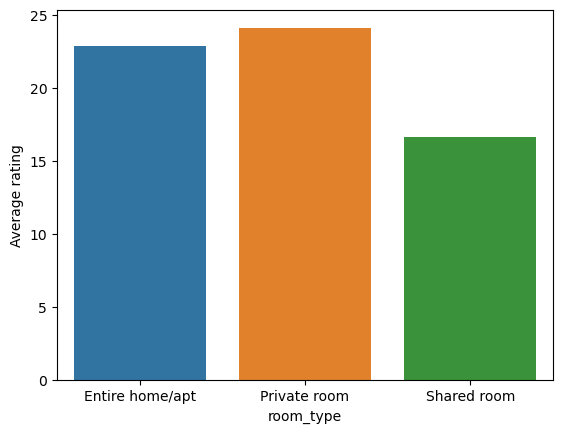

In [46]:
sns.barplot(data=pref_data,x='room_type',y='Average rating')

**Q5: How is the preference for a specific type of property distributed over different neighbourhood groups**

In [47]:
df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [48]:
pref_data=df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().reset_index(name='Average rating')

In [49]:
pref_data

,neighbourhood_group,room_type,Average rating
0,Bronx,Entire home/apt,30.678100
1,Bronx,Private room,25.018405
2,Bronx,Shared room,7.200000
3,Brooklyn,Entire home/apt,27.945183
4,Brooklyn,Private room,21.086952
5,Brooklyn,Shared room,14.026634
6,Manhattan,Entire home/apt,17.815516
7,Manhattan,Private room,26.202706
8,Manhattan,Shared room,21.400000
9,Queens,Entire home/apt,28.933206


<Axes: xlabel='neighbourhood_group', ylabel='Average rating'>

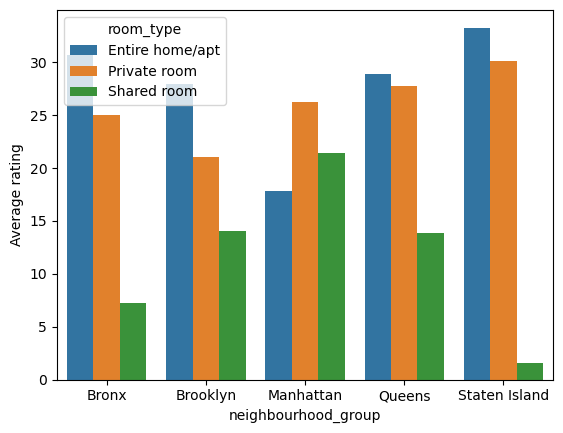

In [51]:
sns.barplot(data=pref_data, x='neighbourhood_group',y='Average rating',hue='room_type')

**Q6: How is the cost distributed over the neighbourhoods**

In [52]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [53]:
cost_data = df.groupby('neighbourhood_group')['price'].mean().reset_index(name='avg_price')

<Axes: xlabel='neighbourhood_group', ylabel='avg_price'>

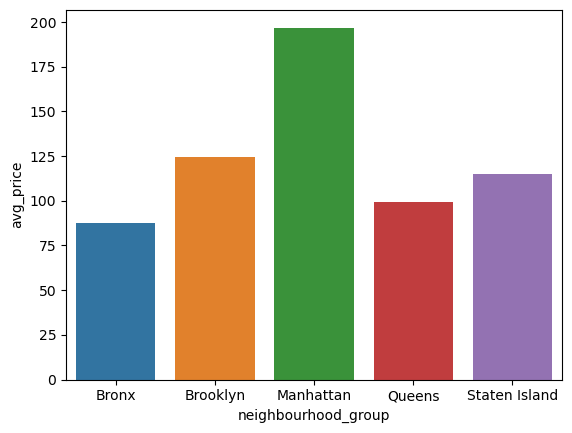

In [55]:
sns.barplot(data=cost_data, x='neighbourhood_group',y='avg_price')

**Q7: What insight can be drawn regarding the distribution of the prices in the dataset?**

In [68]:
dsf = df[df['price']<2000]['price']

<Axes: xlabel='price', ylabel='Count'>

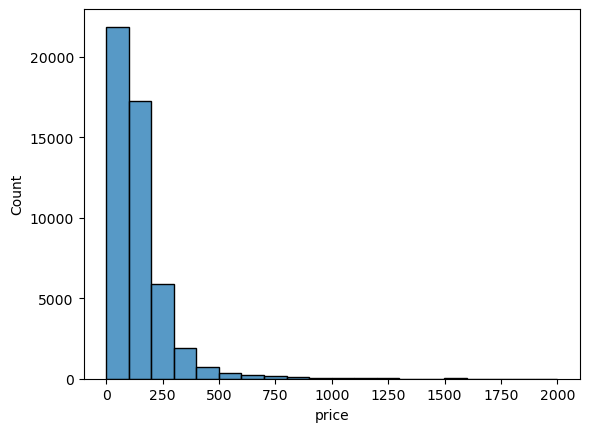

In [70]:
sns.histplot(data=dsf,bins=20)

**Q8: How is the minimum night stay distributed over property listing**

In [72]:
data = df.groupby('room_type')['minimum_nights'].mean().reset_index(name='avg_min_night')

<Axes: xlabel='room_type', ylabel='avg_min_night'>

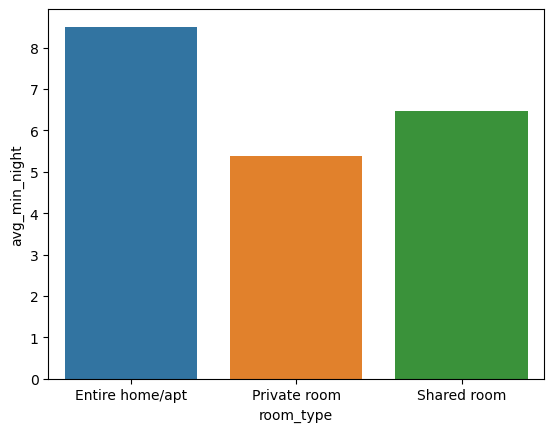

In [73]:
sns.barplot(data=data, x='room_type', y='avg_min_night')

**Q9: How does minimum night stay affect customer preference**

In [81]:
dsf = df[df['minimum_nights']<100]

In [82]:
dsf

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


C:\Users\rahul\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


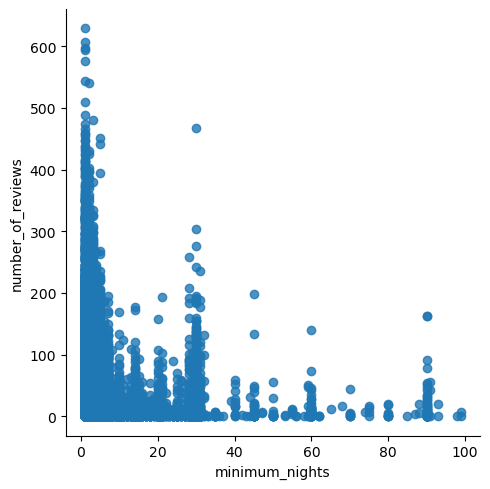

In [86]:
sns.lmplot(data= dsf, x='minimum_nights',y='number_of_reviews',fit_reg=False)

**Thank you**